In [3]:
from sklearn.datasets import make_moons
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN 
from sklearn.cluster import KMeans

In [4]:
x,y=make_moons(100)
data=pd.DataFrame(x)
data.head()

,0,1
0,0.761446,0.648228
1,0.871319,0.490718
2,1.032052,-0.499486
3,1.096023,-0.495379
4,0.672301,0.740278


In [5]:
data.columns=["f1","f2"]
data.head()

,f1,f2
0,0.761446,0.648228
1,0.871319,0.490718
2,1.032052,-0.499486
3,1.096023,-0.495379
4,0.672301,0.740278


In [6]:
data["class"]=y

C:\Users\Chetan\AppData\Local\Temp\ipykernel_16852\2984020764.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data["f1"],data["f2"],cmap=plt.cm.Accent)


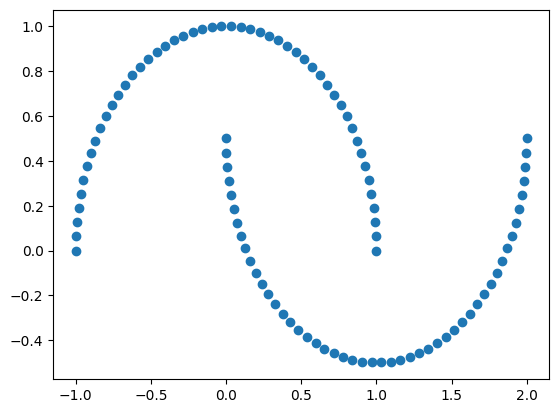

In [7]:
plt.scatter(data["f1"],data["f2"],cmap=plt.cm.Accent)

### With KMeans Clustering

In [8]:
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'elkan')
model.fit(data.drop('class',axis=1))
claas_pr=model.predict(data.iloc[:,:2])
data["class_pr"]=claas_pr
data.head()

,f1,f2,class,class_pr
0,0.761446,0.648228,0,0
1,0.871319,0.490718,0,0
2,1.032052,-0.499486,1,0
3,1.096023,-0.495379,1,0
4,0.672301,0.740278,0,1


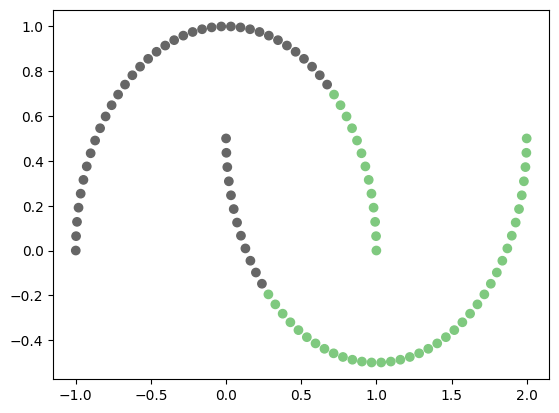

In [9]:
plt.scatter(data["f1"],data["f2"],c=data["class_pr"],cmap=plt.cm.Accent)

### With DBSCAN Clustering

In [10]:
dbs=DBSCAN(min_samples=2,eps=0.2) #min_samples is m/n
claas_pr=dbs.fit_predict(data.iloc[:,:2])

In [12]:
data["class_pr"]=claas_pr
data

,f1,f2,class,class_pr
0,0.761446,0.648228,0,0
1,0.871319,0.490718,0,0
2,1.032052,-0.499486,1,1
3,1.096023,-0.495379,1,1
4,0.672301,0.740278,0,0
...,...,...,...,...
95,-0.284528,0.958668,0,0
96,-0.672301,0.740278,0,0
97,1.981559,0.308841,1,1
98,1.404783,-0.414413,1,1


Text(0, 0.5, 'f2')

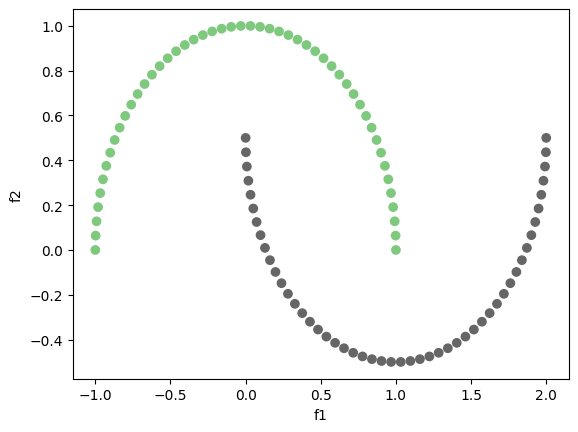

In [13]:
plt.scatter(data["f1"],data["f2"],c=data["class_pr"],cmap=plt.cm.Accent)
plt.xlabel("f1")
plt.ylabel("f2")